In [1]:
require('tidyverse')

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [ ]:
## Look at the CIs that come out of the heritability estimation

In [19]:
H_ERR_OUT <- "../data/h_err_complete/"
trait <- "Testosterone"
OUT_DIR <- "../data/h_err_complete/derived/"

num_draws <- 1600


getInt <- function(vec_est){
    vec_o <- vec_est[order(vec_est)]
    return(vec_o[c(floor(num_draws*0.025),floor(num_draws*0.5),ceiling(num_draws*0.975)) ])
}

getHeritErr <- function(trait){
    trait.files <- list.files(path=H_ERR_OUT, pattern=trait)
    stopifnot(length(trait.files) == 100)
    h_est <- do.call(rbind, lapply(trait.files, function(x) read.table(sprintf("%s/%s", H_ERR_OUT, x), header=TRUE)))
    stopifnot(nrow(h_est) == num_draws)   

    value <- c(getInt(h_est$h_f), getInt(h_est$h_m))
    sex <- c(rep("f", 3), rep("m", 3))
    int <- c("l", "c", "u", "l", "c", "u")
    df <- data.frame(int, sex, value)
    df$trait <- trait
    return(df)
}

getHeritErr("whr")                                   
#write.table(df, sprintf("%s/h_err_%s.txt", OUT_DIR, trait), sep=" ", row.names=FALSE, quote=FALSE)
#trait  int  sex  value
                                   
### TODO - figure out how to do this for pre- + post- meno data!

int,sex,value,trait
l,f,0.2477077,whr
c,f,0.2539318,whr
u,f,0.2597223,whr
l,m,0.1764495,whr
c,m,0.1828305,whr
u,m,0.1890179,whr


[1] 1600    3

draw,h_f,h_m
1,0.04844267,0.1568889
2,0.04681773,0.1465196
3,0.05016884,0.1425336
4,0.05102726,0.1512451
5,0.04973950,0.1439954
6,0.04870458,0.1465122


[1] 0.04285787

[1] 0.04793188

[1] 0.05370924

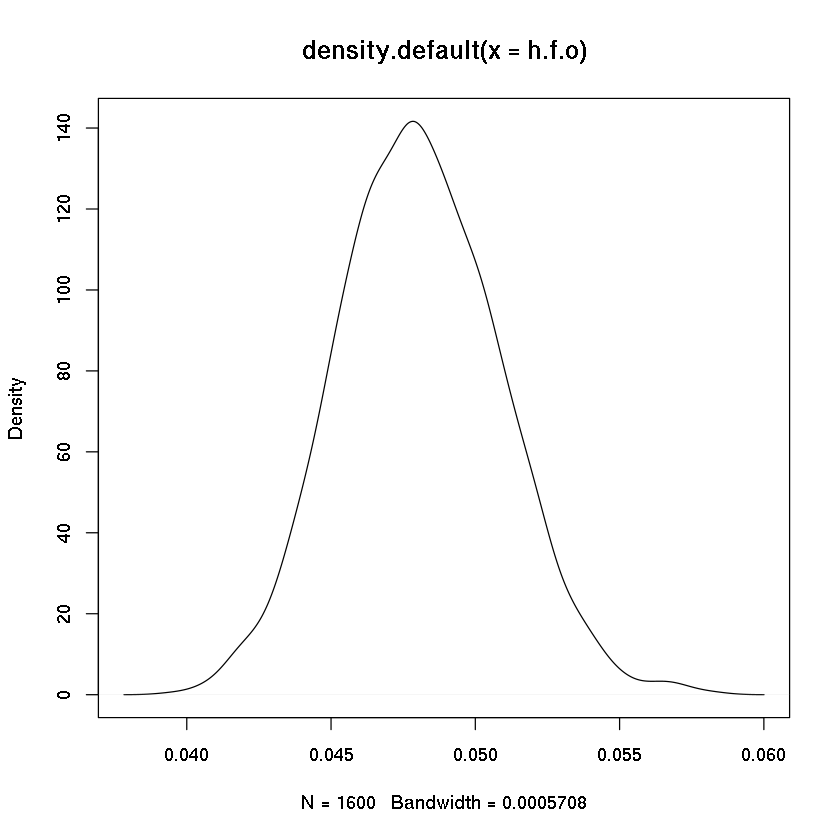

In [11]:
dim(h_est)



head(h_est)


plot(density(h.f.o))

In [25]:
## Create MR phenotypes - irregular periods, metformin, MetS

nchar("1000000023")
nchar("1140884600")

[1] 10

[1] 10

In [38]:
require('data.table')
pheno_df <- fread("../data/hormone_drug_biomarker_df.txt", header=TRUE, sep="\t", data.table=FALSE) 
head(pheno_df)
unique(pheno_df$irregular)
table(is.na(pheno_df$irregular))
table(pheno_df$irregular)



IID,sex,age,preg,pill,hrt,meno.label,period_today,irregular,normalized_day_in_cycle,⋯,Oestradiol,Phosphate,Rheumatoid factor,SHBG,Total bilirubin,Testosterone,Total protein,Triglycerides,Urate,Vitamin D
2314965,0,55,0,0,NA,missing,0,NA,NA,⋯,NA,NA,NA,NA,3.81,0.947,NA,3.386,NA,NA
1142584,0,60,0,0,0,post,NA,NA,NA,⋯,NA,1.316,NA,62.54,8.19,0.754,72.76,1.671,266.6,55.1
3665122,0,74,0,NA,0,surgical_meno,NA,NA,NA,⋯,NA,1.245,NA,51.03,9.27,1.015,76.86,1.311,290.2,73.6
4377492,0,65,0,0,NA,post,NA,NA,NA,⋯,NA,1.165,22.5,45.99,6.14,0.519,71.06,2.506,312.3,51.9
4015997,0,50,0,0,NA,pre,1,0,0,⋯,NA,1.146,NA,66.75,7.52,0.946,73.14,0.780,306.9,56.5
2076736,0,60,0,0,NA,post,NA,NA,NA,⋯,NA,1.357,NA,65.68,6.30,0.506,71.27,0.871,NA,84.2


[1] NA  0  1


 FALSE   TRUE 
 60221 389614 


    0     1 
48978 11243 

In [47]:
irreg <- pheno_df %>% filter(irregular==1 & !is.na(irregular)) 
irreg %>% select(age, preg, pill, meno.label) %>% 
    mutate(pill=as.factor(pill), meno.label=as.factor(meno.label), preg=as.factor(preg)) %>% 
    summary()

irreg_phe <- pheno_df %>% filter(sex==0) %>% select(IID, IID, irregular) %>% 
mutate(irregular= ifelse(is.na(irregular), 0, irregular)) %>% unique()

length(unique(irreg_phe$IID))
sum(table(irreg_phe$irregular))

      age          preg         pill              meno.label  
 Min.   :47.00   0   :11183   -9  : 763   likely_meno  :1849  
 1st Qu.:53.00   1   :   32   0   :8485   male         :   1  
 Median :57.00   NA's:   28   1   : 975   missing      : 334  
 Mean   :56.54                NA's:1020   post         :   2  
 3rd Qu.:59.00                            pre          :9030  
 Max.   :79.00                            surgical_meno:  27  
 NA's   :3705                                                 

[1] 181037

[1] 181831

In [ ]:
## Write code to extract output

In [ ]:
## Simulations